# **Bank customer segmentation**

##### **>Objective:** study current loan application data to predict whether an applicant will be able to repay a loan.

### *1) Exploring our data*

##### Importing libraries & data

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.offline as py 
import plotly.graph_objs as go


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import roc_auc_score, recall_score, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving german_credit_data.csv to german_credit_data.csv


In [ ]:
credit=pd.read_csv('german_credit_data.csv')
del credit["Unnamed: 0"]
print("The DataFrame after deleting the column Unnamed: 0")
credit
#credit.to_string(index=False)

The DataFrame after deleting the column Unnamed: 0


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


#####  The dataset contains 1000 entries with 10 categorial/symbolic attributes, each entry represents a person who takes a credit by a bank.Each person is classified as good or bad credit risks according to the set of attributes
- age : numerical 
- sex : categorical (female, male)
- job : numerical (0[unskilled and non-resident], 1[unskilled and resident], 2[skilled], 3[highly skilled])
- Housing: categorical (own, rent, or free)
- Saving accounts: categorical (little, moderate, quite rich, rich)
NB:Savings account, in DM Deutsch Mark
little : ... < 100 DM
moderate : 100 <= ... < 500 DM
quite rich : 500 <= ... < 1000 DM
rich : .. >= 1000 DM
None : unknown/ no savings account

- Checking account: categorical (little, moderate, quite rich, rich)
NB:Checking account, in DM Deutsch Mark
little : ... < 0 DM
moderate : 0 <= ... < 200 DM
rich : ... >= 200 DM / salary assignments for at least 1 year
None : unknown/ no checking account

- Credit amount: numerical (in DM)
- Duration: numerical (in month)
- Purpose: categorical ( car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk : target column 


##### checking data 

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report

##### noticing that two columns contains NaN values

In [ ]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


##### Data analysis

In [ ]:
SA = credit.loc[:,['Sex','Age']]
fig = px.box(SA, x="Sex", y="Age", points="all",color="Sex")
fig.show()

In [ ]:
Purpose = credit['Purpose']
fig = px.histogram(credit, x="Purpose", color="Purpose")
fig.show()

In [ ]:
SC =credit.loc[:,['Purpose','Credit amount']]
fig = px.box(SC, x="Purpose", y="Credit amount", color="Purpose")
fig.show()

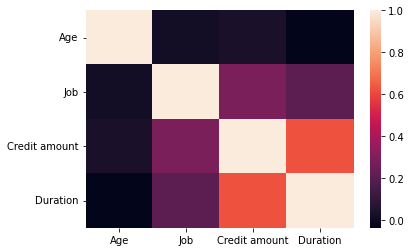

In [ ]:
sns.heatmap(credit.corr())

In [ ]:
Risk = credit['Risk']
fig = px.histogram(credit, x="Risk", color="Risk")
fig.show()

In [ ]:
credit['Risk'] = credit['Risk'].replace(["good"],0)
credit['Risk'] = credit['Risk'].replace(["bad"],1)

In [ ]:
credit['Saving accounts'] = credit['Saving accounts'].fillna('Others')
credit['Checking account'] = credit['Checking account'].fillna('Others')

In [ ]:
credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,Others,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,Others,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,Others,1736,12,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,Others,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,1


In [ ]:
cat_features = ['Sex', 'Job','Housing', 'Saving accounts', 'Checking account','Purpose']
num_features=['Age', 'Credit amount', 'Duration','Risk']
for variable in cat_features:
    dummies = pd.get_dummies(credit[cat_features])
    df1= pd.concat([credit[num_features], dummies],axis=1)


In [ ]:
y= df1['Risk']          
x=df1.drop(['Risk'],axis=1)

In [ ]:
x.shape, y.shape

((1000, 26), (1000,))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 30)

In [ ]:
x_train.shape, x_test.shape

((800, 26), (200, 26))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))

# fit on features dataset
scaler.fit(x_train)
scaler.fit(x_test)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
models = []

models.append(('LR', LogisticRegression(random_state=42)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto',random_state=42)))

models

[('LR', LogisticRegression(random_state=42)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('SVM', SVC(gamma='auto', random_state=42))]

In [ ]:

'''results_recall = []
results_roc_auc= []
names = []
scoring = ['recall', 'roc_auc']

for name, model in models:
        
        skf= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        cv_results = cross_validate(model, x_train, y_train, cv=skf, scoring=scoring)
        results_recall.append(cv_results['test_recall'])
        results_roc_auc.append(cv_results['test_roc_auc'])
        names.append(name)
        msg = "%s- recall:%f roc_auc:%f" % (name, cv_results['test_recall'].mean(),cv_results['test_roc_auc'].mean())
        print(msg)'''
        

'results_recall = []\nresults_roc_auc= []\nnames = []\nscoring = [\'recall\', \'roc_auc\']\n\nfor name, model in models:\n        \n        skf= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)\n        cv_results = cross_validate(model, x_train, y_train, cv=skf, scoring=scoring)\n        results_recall.append(cv_results[\'test_recall\'])\n        results_roc_auc.append(cv_results[\'test_roc_auc\'])\n        names.append(name)\n        msg = "%s- recall:%f roc_auc:%f" % (name, cv_results[\'test_recall\'].mean(),cv_results[\'test_roc_auc\'].mean())\n        print(msg)'

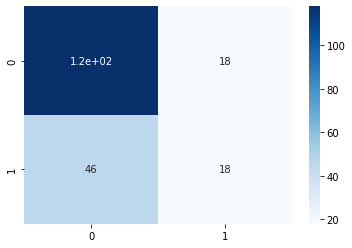

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       136
           1       0.50      0.28      0.36        64

    accuracy                           0.68       200
   macro avg       0.61      0.57      0.57       200
weighted avg       0.65      0.68      0.65       200



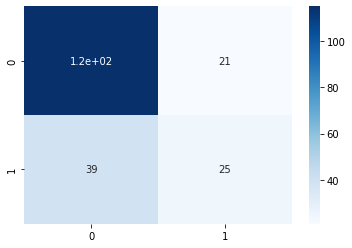

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       136
           1       0.54      0.39      0.45        64

    accuracy                           0.70       200
   macro avg       0.65      0.62      0.62       200
weighted avg       0.68      0.70      0.68       200



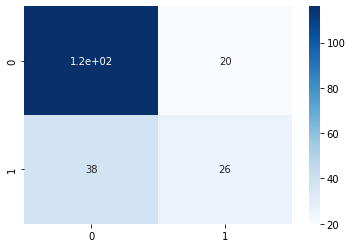

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       136
           1       0.57      0.41      0.47        64

    accuracy                           0.71       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.69      0.71      0.70       200



In [ ]:
models=[SVC(),LogisticRegression(),LinearDiscriminantAnalysis()]

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test,y_pred))